In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Edit this section

* Load_data:
    * load data from csv using `\t` as the separator.
    * Drop irrelevant columns
    * Label encode
    * select the main features and make an array of values (an array of arrays)
        * Example format of this:
            * `x = data_main[['Education', 'Kidhome', 'Teenhome' ......
                   'Z_CostContact', 'Z_Revenue']].values`
    * Scalarization of the features
    * return `scaled_x` variable which is a variable containing the scaled values of x

* apply_pca:
    * return `x_pca` variable which is the set of reduced features.
    * for ideal results, use n_components as 2. Feel free to experiment with this value but n_components = 2 is ideal case.


* find_optimal_clusters:
    * this is to find the optimal number of clusters using the elbow method.
    * find the values of inertia till max_clusters+1 and append the inertia values to an array.
    * return the inertia array with `inertia` variable.

* perform_kmeans_clustering:
    * use kmeans `init = "k-means++"`, `max_iter=300`, `n_init = 10`, `random_state` is your choice and `n_clusters` is the best elbow value.
    * return the kmeans fit predict values with `y_kmeans` variable.

* perform_agglomerative_clustering:
    * Linkage method is "ward" and n_clusters is the best elbow value.
    * return the agglomerative clustering values after fit predicting the `x` feature values as `y_agglomerative` variable name.

In [ ]:
def read_tsv(filepath):
    return pd.read_csv(filepath, sep="\t")

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    
    data_main = read_tsv(filepath)
    
    # Drop irrelevant columns and handle missing values
    data_main = data_main.dropna()
    data_main.drop(['Year_Birth', 'Dt_Customer', 'ID'], axis=1, inplace=True)

    # Convert categorical features to numerical using LabelEncoder
    LE = LabelEncoder()
    object_cols = ['Marital_Status', 'Education', 'Response']
    for col in object_cols:
        data_main[col] = LE.fit_transform(data_main[col])

    # Select features for clustering
    x = data_main[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
                   'Z_CostContact', 'Z_Revenue']].values
    
    # Standardize the features
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(x)
    
    return scaled_x

In [3]:
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components=2):
    pca = PCA(n_components=n_components)
    x_pca = pca.fit_transform(x)
    return x_pca

In [4]:
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    inertia = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(x)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    return inertia

In [5]:
# Perform KMeans Clustering 
def perform_kmeans_clustering(x, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(x)
    return y_kmeans

In [6]:
# Perform Agglomerative Clustering 
def perform_agglomerative_clustering(x, n_clusters=3):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    y_agglomerative = agglomerative.fit_predict(x)
    return y_agglomerative

In [7]:
def get_linkages(x):
    linked = linkage(x, 'ward')
    return linked

In [9]:
def plot_dendrogram(linked):
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Index")
    plt.ylabel("Distance")
    plt.show()

# Do not edit

In [8]:
def calculate_silhouette_score(x, y_pred):
    return silhouette_score(x, y_pred)

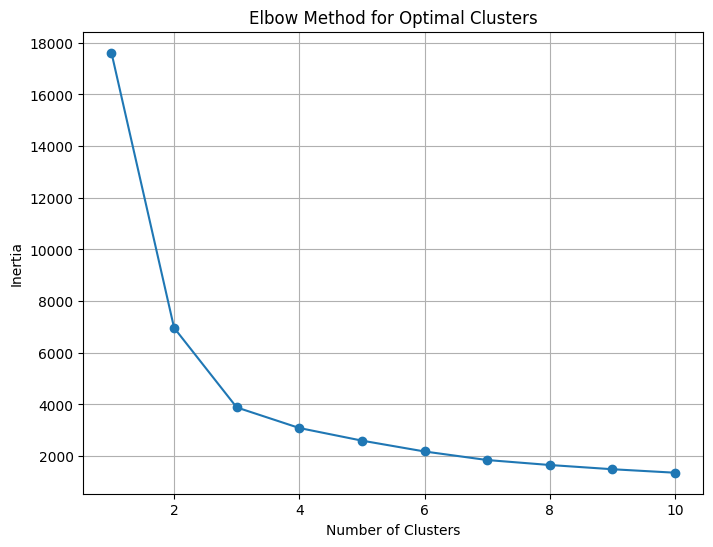

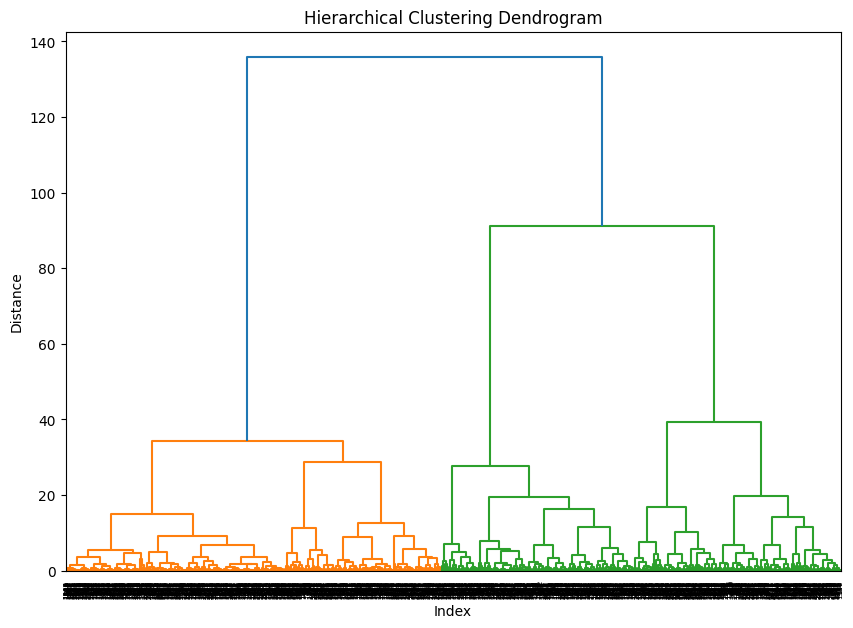

Test Case 1 passed!
Test case 2 passed!


In [10]:
def main(filepath):
    
    x = load_data(filepath)

    # Apply PCA for Dimensionality Reduction (reduce to 2 components)
    x_pca = apply_pca(x, n_components=2)
    
    # KMeans: finding optimal clusters
    inertia = find_optimal_clusters(x_pca)
    
    # KMeans clustering implementation
    y_kmeans = perform_kmeans_clustering(x_pca)
    
    # Agglomerative Clustering
    y_agglomerative = perform_agglomerative_clustering(x_pca)
    
    # Hierarchical Clustering Dendrogram
    hierarchical_linked = get_linkages(x_pca)
    
    # Plot the dendrogram for hierarchical clustering
    plot_dendrogram(hierarchical_linked)
    
    # Silhouette scores
    silhouette_kmeans = calculate_silhouette_score(x_pca, y_kmeans)
    silhouette_agglomerative = calculate_silhouette_score(x_pca, y_agglomerative)
    
    # Return results
    return {
        "inertia": inertia,
        "silhouette_kmeans": silhouette_kmeans,
        "silhouette_agglomerative": silhouette_agglomerative,
        "agglomerative_clustering": y_agglomerative,
        "hierarchical_linked": hierarchical_linked,
        "pca_components": x_pca
    }

# Call the main function and print silhouette scores and dendrogram
result = main("marketing_campaign.csv")
# print(f"KMeans Silhouette Score: {result['silhouette_kmeans']}")
# print(f"Agglomerative Silhouette Score: {result['silhouette_agglomerative']}")

# Silhouette scores checks 
if result['silhouette_kmeans'] >= 0.5:
    print("Test Case 1 passed!")
if result['silhouette_agglomerative'] >= 0.5:
    print("Test case 2 passed!")